In [2]:
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
from matplotlib import pyplot as plt
#import pyGPs

DIR = 'DissolvedOxygenPrediction-master/database/'
files=([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
n=len(files)
var=[]
for i in range(0,len(files)):
    mean=np.asarray([])
    min=np.asarray([])
    max=np.asarray([])
    source=DIR+files[i]
    file = open(source, "r")
    line_number=0
    
    for line in file:
        if line_number==0:
            var.append(files[i]+'_'+line.split()[3])
            var.append(files[i]+'_'+line.split()[5])
            var.append(files[i]+'_'+line.split()[7])
        if line_number>=1 and len(line.split())==9:
            mean=np.append(mean,line.split()[7])
            min=np.append(min,line.split()[5])
            max=np.append(max,line.split()[3])
        elif line_number>=1 and len(line.split())==3:
            mean=np.append(mean,0)
            min=np.append(min,0)
            max=np.append(max,0)
        line_number=line_number+1
    vars()[var[0+i*3]]=max
    vars()[var[1+i*3]]=min
    vars()[var[2+i*3]]=mean
    file.close()
fecha=np.arange(0,len(Dissolved_Oxygen_mean))

#Borar datos defectuosos/no adquiridos.
ind=np.asanyarray([])
for i in range(0,len(var)):
    d=vars()[var[i]]
    for j in range(0,len(vars()[var[0]])):
        if  d[j]=='0' or d[j]=='0.0':
            ind=np.append(ind,j)
            
for i in range(0,len(var)):
    vars()[var[i]]=(np.delete(vars()[var[i]],ind)).astype('float')
fecha=np.delete(fecha,ind)

def Norm(x):
    return np.divide(np.subtract(x,np.mean(x)),np.sqrt(np.var(x)))
def DeNorm(x,X):
    return np.multiply(np.add(x,np.mean(X)),np.sqrt(np.var(X)))
def Normfecha(x):
    n=x.size
    train=np.round(n*.75).astype(float)
    return x/float(x[int(train)])

def RMSE(obs,med):
    r=np.power(np.subtract(obs,med),2)
    return np.sqrt(1/float(len(obs))*np.sum(r))

def Norm2(obs,min,max):    
    return np.divide(np.subtract(obs,min),np.subtract(max,min))

/home/jaime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/jaime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


In [3]:
# Multi input GP
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic,Matern,RBF,Sum,DotProduct, Product, WhiteKernel, RationalQuadratic, ExpSineSquared, ConstantKernel,Exponentiation


In [4]:
# GP a Temperatura
import matplotlib.pyplot as plt
import matplotlib; matplotlib.rcParams['figure.figsize'] = (15, 6)
import numpy as np
import GPy
from IPython.display import display
from matplotlib import gridspec



 /home/jaime/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


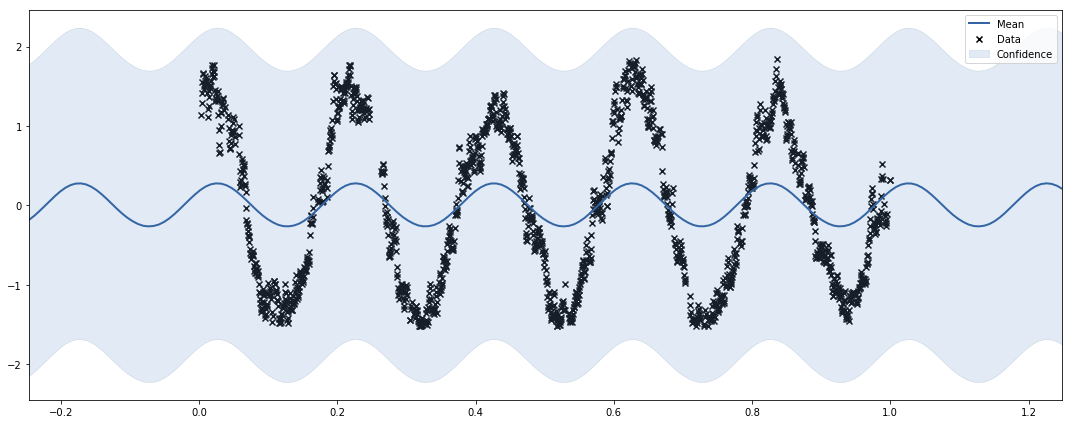

In [111]:
#Cálculo de la Temperatura usando 
train=np.round((fecha.size)*.75).astype(int)
input=Normfecha(fecha)
input.shape=(2092,1)
target=Norm(Temperature_mean)
target.shape=(2092,1)
periodic_kernel3 = GPy.kern.PeriodicExponential(input_dim=1, period=0.2)
Temp_model = GPy.models.GPRegression(input[0:train], target[0:train], periodic_kernel3)
fig5 = Temp_model.plot()
GPy.plotting.show(fig5, filename='Temp')
#Temp_model.periodic_exponential.period = 1.13520025736
Temp_model.periodic_exponential

In [113]:
Temp_model.optimize_restarts(num_restarts=1)

 /home/jaime/anaconda3/lib/python3.6/site-packages/paramz-0.7.4-py3.6.egg/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = -127.06948618530896


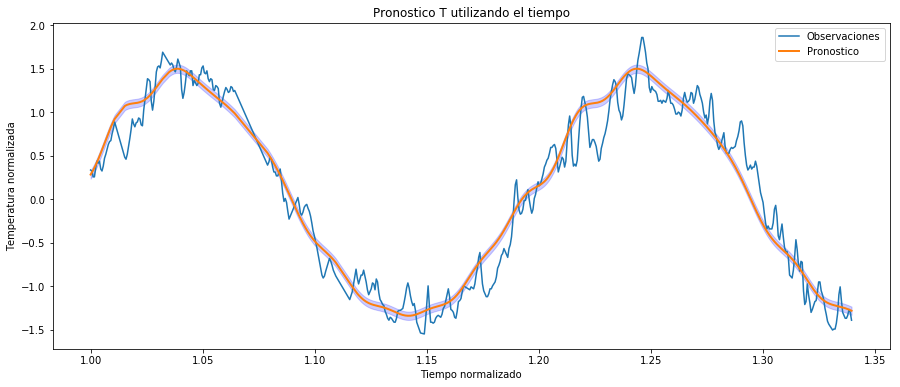

0.227818352182


In [117]:
Temp_pred, Temp_std = Temp_model.predict(input[train:])
inf=Temp_pred-Temp_std
sup=Temp_pred+Temp_std
plt.plot(input[train:],target[train:],label='Observaciones')
plt.plot(input[train:],Temp_pred,label='Pronostico',linewidth=2.0)
plt.xlabel("Tiempo normalizado")
plt.ylabel("Temperatura normalizada")
plt.title("Pronostico T utilizando el tiempo")
plt.fill_between(np.squeeze(input[train:]),np.squeeze(inf),np.squeeze(sup),alpha=0.2, color='b')
plt.legend()
f.savefig("T-t.pdf")
plt.show()

print(RMSE(Temp_pred,target[train:]))


 /home/jaime/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


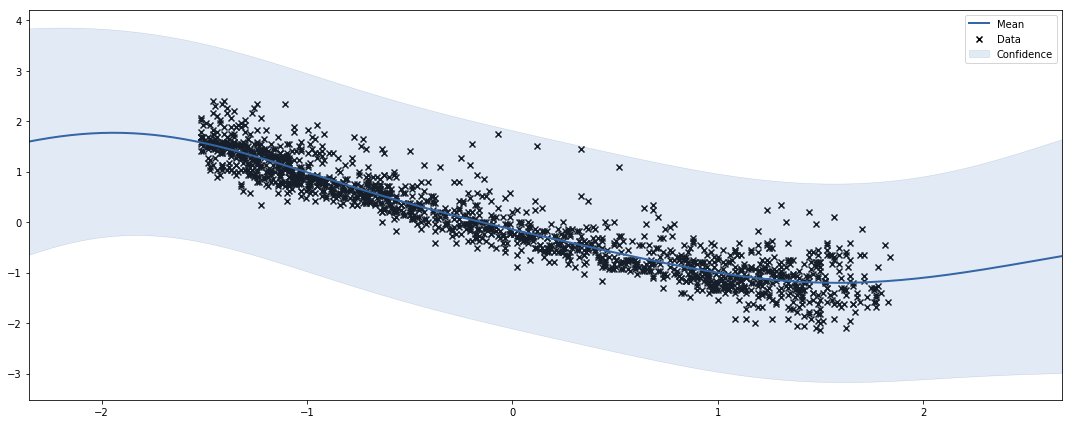

In [8]:
train=np.round((fecha.size)*.75).astype(int)
input=Norm(Temperature_mean)
input.shape=(2092,1)
target=Norm(Dissolved_Oxygen_mean)
target.shape=(2092,1)
RBF_kernel=GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0, ARD=False)
Temp_model = GPy.models.GPRegression(input[0:train], target[0:train], RBF_kernel)
fig5 = Temp_model.plot()
GPy.plotting.show(fig5, filename='Temp')

In [9]:
Temp_model.optimize_restarts(num_restarts=2)

Optimization restart 1/2, f = 570.6188148221079
Optimization restart 2/2, f = 570.6187420429221


In [11]:
DO_predT, DO_stdT = Temp_model.predict(input[train:])
y_pred2, y_std2 = Temp_model.predict(input[0:train])
inf=y_pred-y_std
sup=y_pred+y_std
plt.plot(input[0:train],target[0:train],'*',)
plt.plot(input[0:train],y_pred2,linewidth=2.0)
plt.plot(input[train:],target[train:],'*',label='Observaciones')
plt.plot(input[train:],y_pred,label='Pronostico',linewidth=2.0)
plt.xlabel("Tiempo normalizado")
plt.ylabel("Temperatura normalizada")
plt.title("Pronostico T utilizando el tiempo")
plt.fill_between(np.squeeze(input[train:]),np.squeeze(inf),np.squeeze(sup),alpha=0.2, color='b')
plt.legend()
plt.show()
rint(RMSE(y_pred,target[train:]))

NameError: name 'y_pred' is not defined

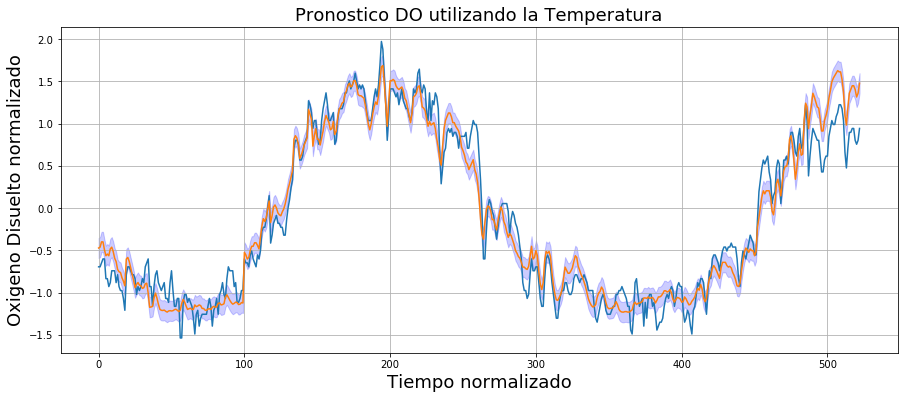

0.22321029958


In [103]:
f=plt.figure()
plt.plot(target[train:],label='Observaciones')
plt.plot(y_pred,label='Pronostico')
inf=np.squeeze(y_pred-y_std)
sup=np.squeeze(y_pred+y_std)
a=np.squeeze(y_pred)
plt.fill_between(np.arange(y_pred.size),inf,sup,alpha=0.2, color='b')
plt.xlabel("Tiempo normalizado",fontsize=18)
plt.ylabel("Oxigeno Disuelto normalizado",fontsize=18)
plt.title("Pronostico DO utilizando la Temperatura",fontsize=18)
#plt.plot(y_pred+y_std)
plt.grid(True)
plt.show()
f.savefig("DO-T.pdf")
print(RMSE(y_pred,target[train:]))

In [12]:
train=np.round((fecha.size)*.75).astype(int)
input=Normfecha(fecha)
input.shape=(2092,1)
target=Norm(Dissolved_Oxygen_mean)
target.shape=(2092,1)
periodic_kernel1 = GPy.kern.PeriodicExponential(input_dim=1, period=0.3)
DO_model = GPy.models.GPRegression(input[0:train], target[0:train], periodic_kernel1)
DO_model.optimize_restarts(num_restarts=3)



Optimization restart 1/3, f = 514.4149402679942
Optimization restart 2/3, f = 605.6808355038156
Optimization restart 3/3, f = 2246.0353695723034


In [13]:
DO_pred, DO_std = DO_model.predict(input[train:])
f=plt.figure()
plt.plot(target[train:],label='Observaciones')
plt.plot(y_pred,label='Pronostico')
inf=np.squeeze(y_pred-y_std)
sup=np.squeeze(y_pred+y_std)
a=np.squeeze(y_pred)
plt.fill_between(np.arange(y_pred.size),inf,sup,alpha=0.2, color='b')
plt.xlabel("Tiempo normalizado",fontsize=18)
plt.ylabel("Oxigeno Disuelto normalizado",fontsize=18)
plt.title("Pronostico DO utilizando el tiempo",fontsize=18)
#plt.plot(y_pred+y_std)
plt.grid(True)
plt.show()
f.savefig("DO-time.pdf")
print(RMSE(y_pred,target[train:]))

NameError: name 'y_pred' is not defined

In [122]:
#Cálculo del DO usando las predicciones de la Temp.
train=np.round((fecha.size)*.75).astype(int)
input=Norm(Temperature_mean)
input.shape=(2092,1)
target=Norm(Dissolved_Oxygen_mean)
target.shape=(2092,1)
RBF_kernel=GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0, ARD=False)
Temp_model = GPy.models.GPRegression(input[0:train], target[0:train], RBF_kernel)
fig5 = Temp_model.plot()
GPy.plotting.show(fig5, filename='Temp')
Temp_model.optimize_restarts(num_restarts=2)


Optimization restart 1/2, f = 570.6188148221079
Optimization restart 2/2, f = 570.6187418431939


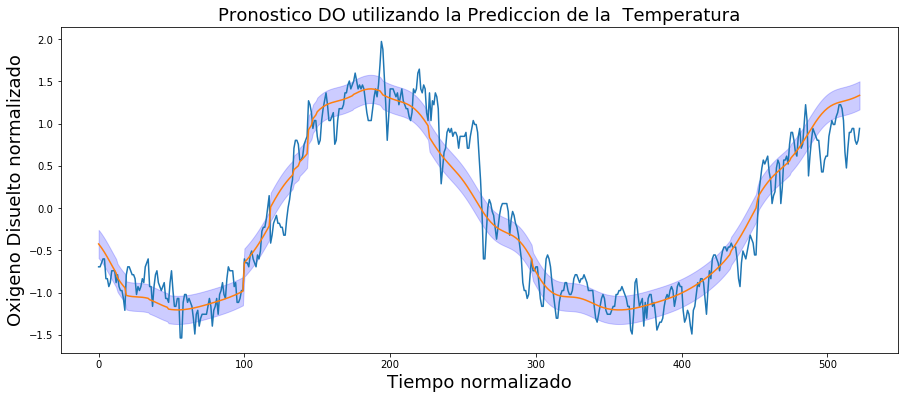

0.272730518478


In [131]:
DO_pred2T, DO_std2T = Temp_model.predict(Temp_pred)
plt.plot(target[train:])
plt.plot(DO_pred2T)
plt.show()
inf=np.squeeze(DO_pred2T-DO_std2T-Temp_std)
sup=np.squeeze(DO_pred2T+DO_std2T+Temp_std)
plt.fill_between(np.arange(DO_pred2T.size),inf,sup,alpha=0.2, color='b')
plt.xlabel("Tiempo normalizado",fontsize=18)
plt.ylabel("Oxigeno Disuelto normalizado",fontsize=18)
plt.title("Pronostico DO utilizando la Prediccion de la  Temperatura",fontsize=18)
f.savefig("DO-PT.pdf")
print(RMSE(target[train:],DO_pred2T))



In [ ]:
k2 = 766.83721954*ExpSineSquared(length_scale=25.9447023823, periodicity=0.411280402526) + WhiteKernel(noise_level=0.0946454552543, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=k2, alpha=0,optimizer='fmin_l_bfgs_b',n_restarts_optimizer=0, normalize_y=False, copy_X_train=False, random_state=None)
gp.fit(input[0:train], target[0:train])
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"% gp.log_marginal_likelihood(gp.kernel_.theta))

In [148]:

#input=np.vstack((Norm(Temperature_mean),Normfecha(fecha)))
#input.shape=(2092,2)
train=np.round((fecha.size)*.75).astype(int)
input=Normfecha(fecha)
input.shape=(2092,1)
target=Norm(Dissolved_Oxygen_mean)
target.shape=(2092,1)

In [149]:
#Utilizando DO y fecha
sigma_noise = 0.0946454552543
kernel_variance = np.log(7666.83721954)
kernel_scale = np.log(25.9447023823)
period = np.log(0.411280402526)

k2 = 766.83721954*ExpSineSquared(length_scale=25.9447023823, periodicity=0.411280402526) + WhiteKernel(noise_level=0.0946454552543, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=k2, alpha=0,optimizer='fmin_l_bfgs_b',n_restarts_optimizer=0, normalize_y=False, copy_X_train=False, random_state=None)
gp.fit(input[0:train], target[0:train])
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"% gp.log_marginal_likelihood(gp.kernel_.theta))

GPML kernel: 0.77**2 * ExpSineSquared(length_scale=0.172, periodicity=0.413) + WhiteKernel(noise_level=0.0924)
Log-marginal-likelihood: -451.210


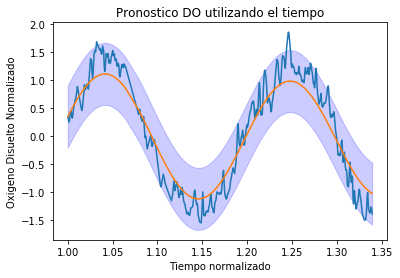

0.299233686674


In [6]:
y_pred, y_std = gp.predict(input[train:], return_std=True)
std=np.sqrt(np.diag(np.diag(y_std)))
inf=np.squeeze(y_pred)-std
sup=np.squeeze(y_pred)+std
plt.plot(input[train:],target[train:],label='Observaciones')
plt.plot(input[train:],y_pred,label='Pronostico')
plt.xlabel("Tiempo normalizado")
plt.ylabel("Oxigeno Disuelto Normalizado")
plt.title("Pronostico DO utilizando el tiempo")
plt.fill_between(np.squeeze(input[train:]),inf,sup,alpha=0.2, color='b')
plt.show()
print(RMSE(y_pred,target[train:]))

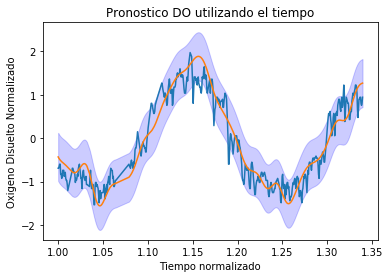

0.301760123686


In [85]:
y_pred, y_std = gp.predict(input[train:], return_std=True)
std=np.sqrt(np.diag(np.diag(y_std)))
inf=np.squeeze(y_pred)-std
sup=np.squeeze(y_pred)+std
plt.plot(input[train:],target[train:],label='Observaciones')
plt.plot(input[train:],y_pred,label='Pronostico')
plt.xlabel("Tiempo normalizado")
plt.ylabel("Oxigeno Disuelto Normalizado")
plt.title("Pronostico DO utilizando el tiempo")
plt.fill_between(np.squeeze(input[train:]),inf,sup,alpha=0.2, color='b')
plt.show()
print(RMSE(y_pred,target[train:]))

/home/ids-pc2/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in divide


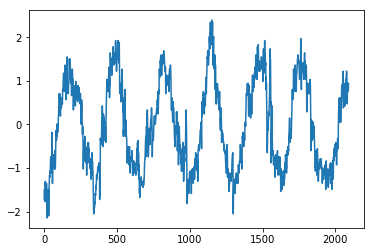

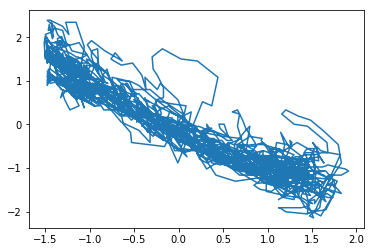

In [147]:
#Utilizando DO y Temperatura
#input=np.vstack((Norm(Temperature_mean),Normfecha(fecha)))
#input.shape=(2092,2)
train=np.round((fecha.size)*.75).astype(int)
input=Norm(Temperature_min)
input.shape=(2092,1)
target=Norm(Dissolved_Oxygen_mean)
target.shape=(2092,1)

target2=Norm2(Dissolved_Oxygen_mean,Dissolved_Oxygen_min,Dissolved_Oxygen_max)
input2=Norm2(Temperature_mean,Temperature_min,Temperature_max)

input=input
target=target
plt.plot(target)
plt.show()
plt.plot(input,target)
plt.show()

In [142]:
alphav=Norm(Dissolved_Oxygen_max)-Norm(Dissolved_Oxygen_min)
k2 = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0))+ WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
k2=Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=1.5)+WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
k2=RationalQuadratic(length_scale=1.0, alpha=1.0, length_scale_bounds=(1e-05, 100000.0), alpha_bounds=(1e-05, 100000.0))+WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
k2=ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(1e-05, 100000.0), periodicity_bounds=(1e-05, 100000.0))
k2 = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0))+ WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

gp = GaussianProcessRegressor(kernel=k2, alpha=0,optimizer='fmin_l_bfgs_b',n_restarts_optimizer=0, normalize_y=False, copy_X_train=False, random_state=None)
gp.fit(input[0:train], target[0:train])
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"% gp.log_marginal_likelihood(gp.kernel_.theta))

GPML kernel: RBF(length_scale=160) + WhiteKernel(noise_level=0.0151)
Log-marginal-likelihood: 1055.619


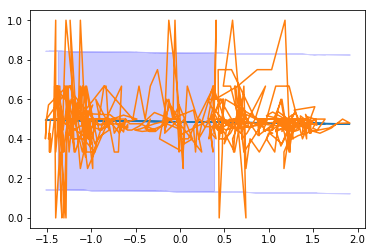

ValueError: operands could not be broadcast together with shapes (523,) (2092,) 

In [146]:
y_pred, y_std = gp.predict(input[train:], return_std=True)
std=np.sqrt(np.diag(np.diag(y_std)))
inf=np.squeeze(y_pred)-std
sup=np.squeeze(y_pred)+std
plt.plot(input[train:],y_pred)
plt.plot(input[train:],target[train:])
plt.fill_between(np.squeeze(input[train:]),inf,sup,alpha=0.2, color='b')
plt.show()

print(RMSE(y_pred,target[train:]))


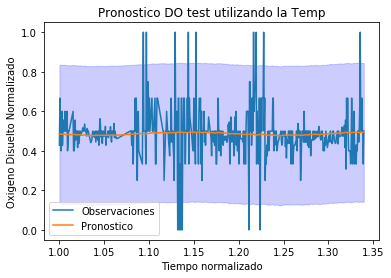

In [138]:
input=Normfecha(fecha)
plt.figure()
plt.plot(input[train:],target[train:],label='Observaciones')
plt.plot(input[train:],y_pred,label='Pronostico')
plt.xlabel("Tiempo normalizado")
plt.ylabel("Oxigeno Disuelto Normalizado")
plt.title("Pronostico DO test utilizando la Temp")
plt.legend()
plt.fill_between(np.squeeze(input[train:]),inf,sup,alpha=0.2, color='b')
plt.show()

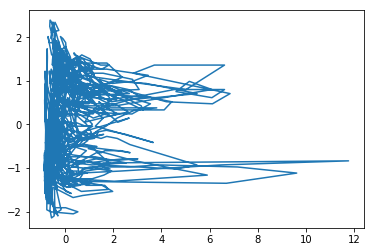

In [98]:
#Utilizando DO y RD
train=np.round((fecha.size)*.75).astype(int)
input=Norm(River_Discharge_mean)
input.shape=(2092,1)
target=Norm(Dissolved_Oxygen_mean)
target.shape=(2092,1)
plt.plot(input,target)
plt.show()

In [106]:
alphav=Norm(Dissolved_Oxygen_max)-Norm(Dissolved_Oxygen_min)
k2 = 66.0**2 * RBF(length_scale=67.0)+WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
k2=1.0 *ExpSineSquared(length_scale=1.3, periodicity=1.0)+WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=k2, alpha=0,optimizer='fmin_l_bfgs_b',n_restarts_optimizer=1, normalize_y=False, copy_X_train=False, random_state=None)
gp.fit(input[0:train], target[0:train])
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"% gp.log_marginal_likelihood(gp.kernel_.theta))

GPML kernel: 0.359**2 * ExpSineSquared(length_scale=0.492, periodicity=2.38) + WhiteKernel(noise_level=0.863)
Log-marginal-likelihood: -2125.096


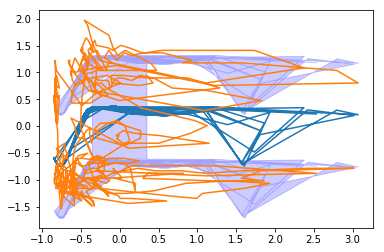

0.926815798354


In [107]:
y_pred, y_std = gp.predict(input[train:], return_std=True)
std=np.sqrt(np.diag(np.diag(y_std)))
inf=np.squeeze(y_pred)-std
sup=np.squeeze(y_pred)+std
plt.plot(input[train:],y_pred)
plt.plot(input[train:],target[train:])
plt.fill_between(np.squeeze(input[train:]),inf,sup,alpha=0.2, color='b')
plt.show()

print(RMSE(y_pred,target[train:]))

In [2]:
import pyGPs
import numpy as np
import matplotlib.pyplot as plt

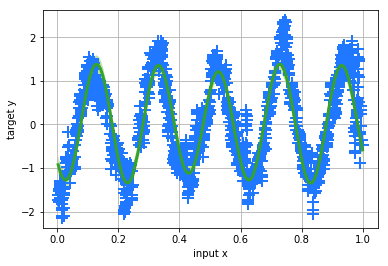

[  2.59447024e+01   6.00000000e-01   7.66683722e+03   9.46454553e-02]


In [3]:
# 1. Predecir DO con el tiempo.
input=Normfecha(fecha)
target=Norm(Dissolved_Oxygen_mean)
n=Dissolved_Oxygen_mean.size
train=np.round(n*.75).astype(int)
test=np.round(n*.25).astype(int)

periodic_model = pyGPs.GPR()
sigma_noise = 0.0946454552543
kernel_variance = np.log(7666.83721954)
kernel_scale = np.log(25.9447023823)
period = np.log(0.6)
periodic_k = pyGPs.cov.Periodic(log_p=period, log_ell=kernel_scale, log_sigma=kernel_variance) + pyGPs.cov.Const(log_sigma=np.log(sigma_noise))
periodic_model.setPrior(kernel = periodic_k)
periodic_model.getPosterior(input[0:train], target[0:train])
periodic_model.predict(input[0:train])
periodic_model.plot()
print(np.exp(periodic_model.covfunc.hyp))


In [38]:
#min_threshold = 440.0
#periodic_model.setOptimizer(method="Minimize", min_threshold=440.0)
#periodic_model.optimize(input[0:train], target[0:train])
periodic_model.optimize()

676.315066046
[  1.84245396e+01   6.16623894e-01   8.55701468e+03   9.46454553e-02]


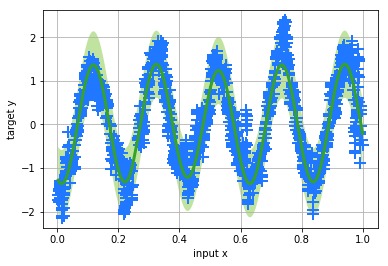

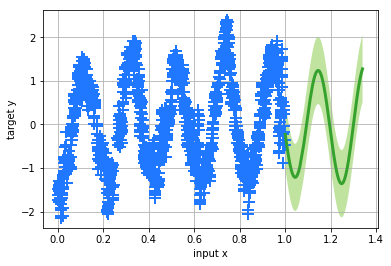

In [39]:
print(periodic_model.nlZ)
print(np.exp(periodic_model.covfunc.hyp))
periodic_model.predict(input[0:train])
periodic_model.plot()
periodic_model.predict(input[train:])
periodic_model.plot()



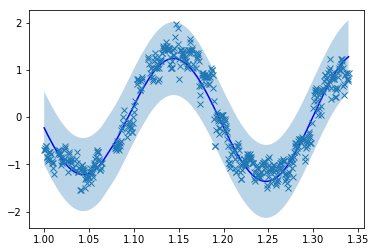

In [40]:
def plot_mean_std(x, mean, std, real):
    fig = plt.figure()
    #print(x.shape)
    #print(mean.shape)
    #print(std.shape)
    plt.plot(x, mean, "b", label = "Mean")
    mean = np.reshape(mean, (mean.shape[0],))
    x = np.reshape(x, (x.shape[0],))
    std = np.reshape(std, (std.shape[0],))
    real = np.reshape(real, (std.shape[0],))
    plt.fill_between(x, mean+2*std, mean-2*std, alpha = 0.3)
    plt.plot(x, real, 'x')
    plt.show()


ym, ys2, fm, fs2, lp = periodic_model.predict(input[train:])
plot_mean_std(input[train:], ym, np.sqrt(ys2), target[train:])



In [193]:
# 1. Predecir DO con la temperatura.
input=np.vstack((Norm(Temperature_mean),Normfecha(fecha)))
input.shape=(2092,2)
target=Norm(Dissolved_Oxygen_mean)
target.shape=(2092,1)

n=Dissolved_Oxygen_mean.size
train=np.round(n*.75).astype(int)
test=np.round(n*.25).astype(int)
constant_model = pyGPs.GPR()
kernel_variance = np.log(1)
constant_k = pyGPs.Core.cov.Const(log_sigma=kernel_variance)
constant_model.getPosterior(input[0:train,:], target[0:train])
constant_model.predict(input[0:train,:])
constant_model.plot()
print(np.exp(periodic_model.covfunc.hyp))

ValueError: cannot reshape array of size 3138 into shape (1569,)

In [44]:
constant_model.optimize()

570.621885419
[ 1.85762055  1.78293308]


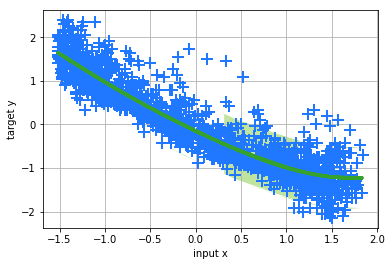

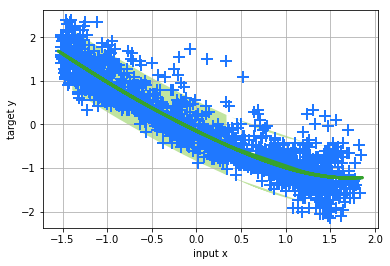

In [45]:
print(constant_model.nlZ)
print(np.exp(constant_model.covfunc.hyp))
constant_model.predict(input[0:train])
constant_model.plot()
constant_model.predict(input[train:])
constant_model.plot()
